# 正态性检验
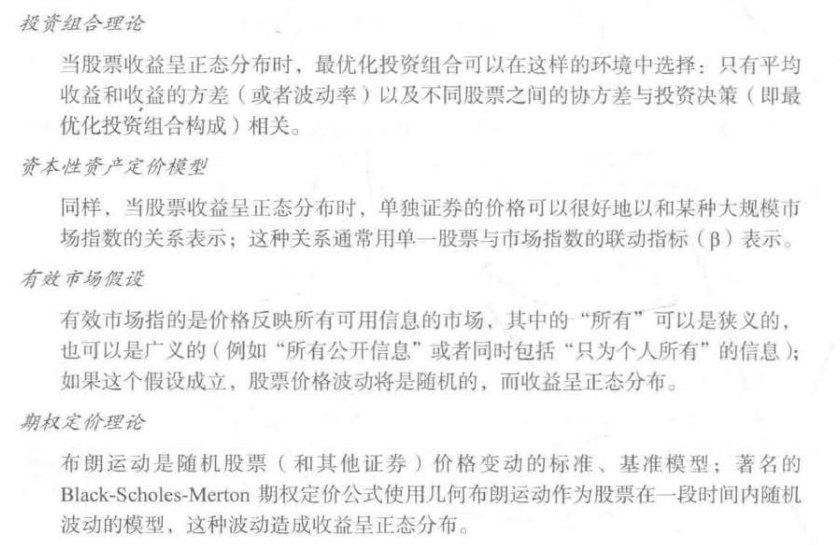

从几何布朗运动开始，它是金融建模中使用的规范随机过程之一，关于几何布朗运动中的运动特性：

_正太对数收益率_

在两个时点之间的对数收益率$log\frac{S_{t}}{S_{s}}=logS_{t}-logS_{s}$

_对数-正态价值_

在任何时点t>0，价值$S_{t}$呈正态分布

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
#为几何布朗运动生成蒙特卡洛路径
def gen_paths(S0,r,sigma,T,M,I):
    dt=float(T)/M
    paths=np.zeros((M+1,I),np.float64)
    paths[0]=S0
    for t in range(1,M+1):
        rand=np.random.standard_normal(I)
        rand=(rand-rand.mean())/rand.std()
        paths[t]=paths[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*rand)
    return paths

In [3]:
S0=100
r=0.05
sigma=0.2
T=1
M=50
I=250000

In [4]:
paths=gen_paths(S0,r,sigma,T,M,I)


Text(0, 0.5, 'index level')

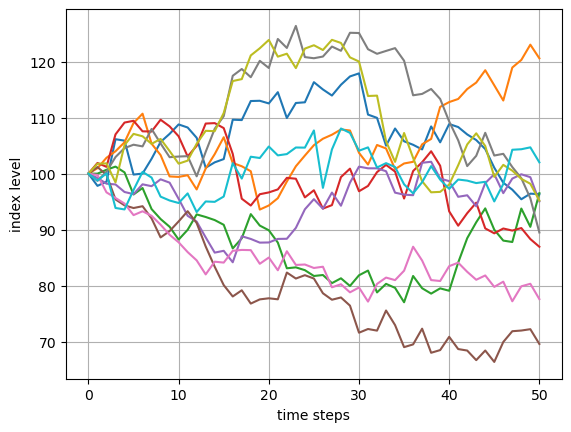

In [5]:
plt.plot(paths[:,:10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [6]:
log_returns=np.log(paths[1:]/paths[0:-1])

In [7]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [8]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [9]:
def print_statictics(array):
    sta=scs.describe(array)
    print('%14s %15s'%('statistic','value'))
    print(30*'-')
    print('%14s %15.5f'%('size',sta[0]))
    print('%14s %15.5f'%('min',sta[1][0]))
    print('%14s %15.5f'%('max',sta[1][1]))
    print('%14s %15.5f'%('mean',sta[2]))
    print('%14s %15.5f'%('std',np.sqrt(sta[3])))
    print('%14s %15.5f'%('skew',sta[4]))
    print('%14s %15.5f'%('kurtosis',sta[5]))

In [10]:
print_statictics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


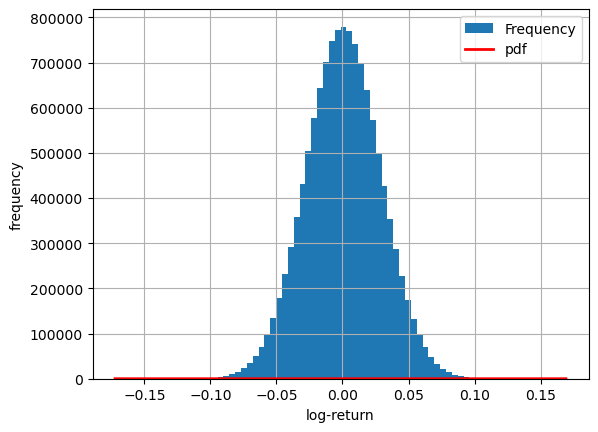

In [11]:
plt.hist(log_returns.flatten(),bins=70,label='Frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(x,loc=r/M,scale=sigma/np.sqrt(M)),'r',lw=2,label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

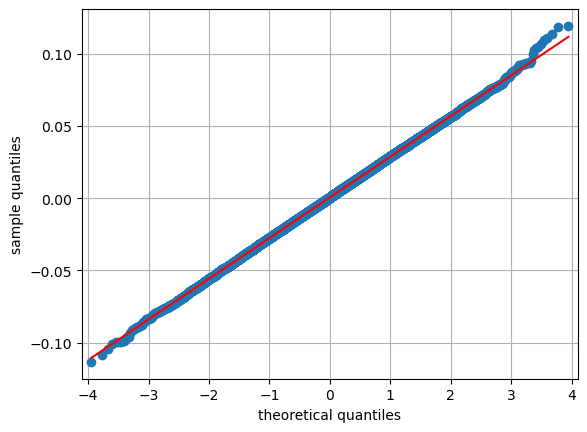

In [12]:
#QQ图
sm.qqplot(log_returns.flatten()[::500],line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

**正态性检验**

偏斜度测试


峰度测试

正态性测试

In [13]:
def normality_tests(arr):
    print('Skew of data set %14.3f'%scs.skew(arr))
    print('Skew test p-value %14.3f'%scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f'%scs.kurtosis(arr))
    print('Kurt test p-value %14.3f'%scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f'%scs.normaltest(arr)[1])

In [14]:
normality_tests(log_returns.flatten())

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


In [15]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import akshare as ak



df=pd.DataFrame()
df['MSFT']=ak.stock_us_daily(symbol='MSFT',adjust='')['close']


df['AAPL']=ak.stock_us_daily(symbol='AAPL',adjust='')['close']

In [16]:
df['AAPL']=ak.stock_us_daily(symbol='AAPL',adjust='')['close']
df=df.iloc[1000:2000]

In [17]:
df

,MSFT,AAPL
1000,99.25,25.865
1001,98.00,25.375
1002,98.75,24.745
1003,100.00,24.395
1004,103.75,24.885
...,...,...
1995,84.00,37.485
1996,84.50,38.500
1997,81.25,39.235
1998,80.75,39.515


<AxesSubplot:>

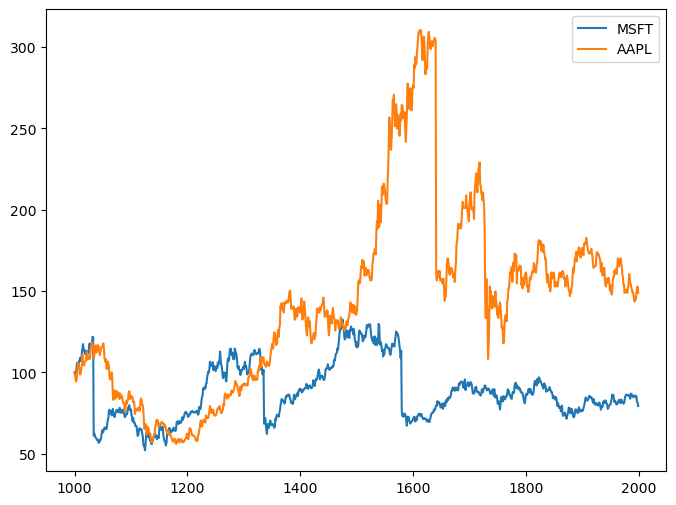

In [18]:
(df/df.iloc[0]*100).plot(figsize=(8,6))

array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'AAPL'}>]], dtype=object)

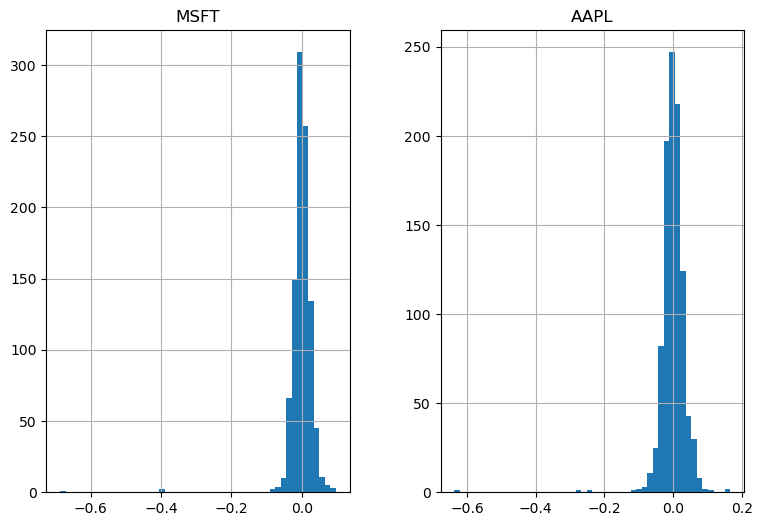

In [19]:
log_returns=np.log(df/df.shift(1))
log_returns.hist(bins=50,figsize=(9,6))

# 投资组合优化

现代/均值-方差投资组合理论（MPT）是金融理论的重要基础

In [20]:
symbols=['AAPL','MSFT','DB','GLD']
data=pd.DataFrame()
for i in symbols:
    data[i]=ak.stock_us_daily(symbol=i).loc[:2000,:]['close']

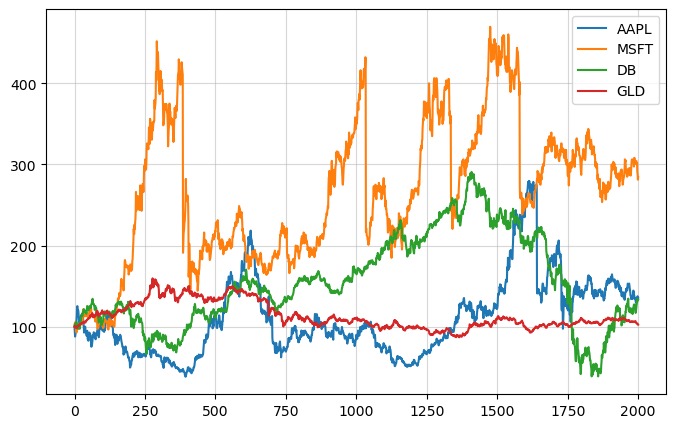

In [21]:
(data/data.iloc[0]*100).plot(figsize=(8,5))
plt.grid(True,alpha=0.5)

In [22]:
rets=np.log(data/data.shift(1))

In [23]:
#查看年化收益表现
rets.mean()*252

AAPL    0.038114
MSFT    0.131693
DB      0.036196
GLD     0.003065
dtype: float64

In [24]:
#投资资产的协方差矩阵
rets.cov()*252

,AAPL,MSFT,DB,GLD
AAPL,0.323322,0.005900,-0.000731,-0.002362
MSFT,0.005900,0.347688,0.004695,0.000226
DB,-0.000731,0.004695,0.224608,0.001698
GLD,-0.002362,0.000226,0.001698,0.025815


**我们假设投资者不允许在某种证券上建立空头头寸。只允许多头头寸意味着投资者的财富将在可用资产中分配，所有头寸均为多头头寸，且头寸的总和为100%。例如，可以在4种证券中投入相同的资金量。**


In [25]:
weights=np.random.random(4)
weights/=np.sum(weights)

weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

下面公式代表在给定单一证券权重情况下的预期投资组合收益。这是假定历史平均表现是未来（预期）表现得最佳预测因素时得预期投资收益公式。公式中，$r_{i}$是状态相关未来收益，而$u_{i}$是证券i的预期收益。最后$w^{T}$是权重向量的转置，$\mu$是预期证券收益的向量

**预期收益一般公式**
$$
\mu_{p}=E(\sum_{I}w_{i}r_{i})=\sum_{I}w^{T}\mu_{i}
$$


In [26]:
np.sum(rets.mean()*weights)*252

0.03448587037672636

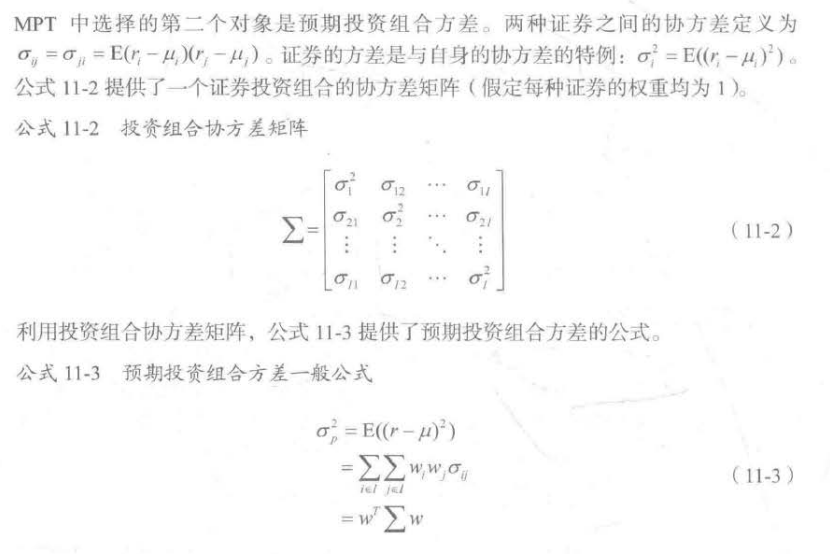

In [27]:
np.dot(weights.T,np.dot(rets.cov()*252,weights))

0.09545449147846546

In [28]:
#进行蒙特卡洛模拟
prets=[]
pvols=[]
for p in range(2500):
    weights=np.random.random(4)
    weights/=np.sum(weights)
    prets.append(np.sum(rets.mean()*weights)*252)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights))))
prets=np.array(prets)
pvols=np.array(pvols)

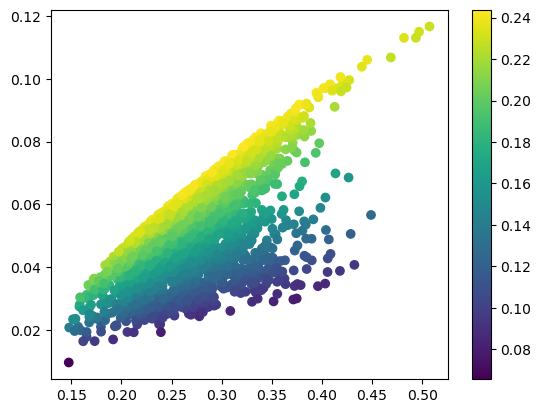

In [29]:
import seaborn as sns
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.colorbar()


# 投资组合优化

In [30]:
def statistics(weights):
    weights=np.array(weights)
    pret=np.sum(rets.mean()*weights)*252
    pvol=np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights)))
    return np.array(([pret,pvol,pret/pvol]))

#计算出最优的夏普指数

In [31]:
import scipy.optimize as sco
#对夏普指数最大化
def min_func_sharpe(weights):
    return -statistics(weights)[2]

#增加约束
cons=({'type':'eq','fun':lambda x:np.sum(x)-1})
bnds=tuple((0,1) for x in range(4))

#优化函数给出的起始参数列表
4*[1/4]

[0.25, 0.25, 0.25, 0.25]

In [32]:
opts=sco.minimize(min_func_sharpe,4*[1/4],method='SLSQP',bounds=bnds,constraints=cons)
opts

     fun: -0.24395162691761196
     jac: array([ 6.48619607e-04, -4.71344218e-04,  6.81972131e-04, -1.47577375e-05])
 message: 'Optimization terminated successfully'
    nfev: 41
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.14864025, 0.49607594, 0.20279087, 0.15249293])

In [33]:
statistics(opts['x'].round(3))

array([0.07881274, 0.32306729, 0.24395148])

In [34]:
#接下来最小化投资组合的方差
def min_func_var(weights):
    return statistics(weights)[1]**2

optv=sco.minimize(min_func_var,4*[1/4],method='SLSQP',bounds=bnds,constraints=cons)

In [35]:
optv

     fun: 0.020435841183283534
     jac: array([0.04013442, 0.04092829, 0.04090956, 0.04092599])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.06702405, 0.05606866, 0.08412059, 0.7927867 ])

In [36]:
statistics(optv['x'].round(3))

array([0.01539977, 0.14295408, 0.10772527])

# 有效边界
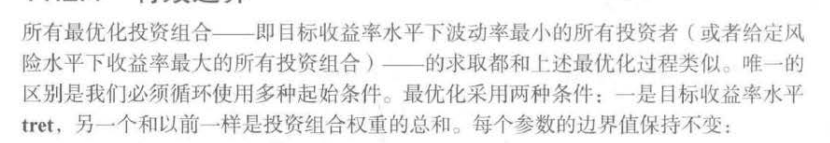

In [37]:
#现在加入一个目标收益率水平
cons=({'type':'eq','fun':lambda x : statistics(x)[0]-tret},
     {'type':'eq','fun':lambda x : np.sum(x)-1})
bnds=tuple((0,1) for x in weights)

def min_func_port(weights):
    return statistics(weights)[1]

trets=np.linspace(0,0.25,50)
tvols=[]
for tret in trets:
    cons=({'type':'eq','fun':lambda x : statistics(x)[0]-tret},
     {'type':'eq','fun':lambda x : np.sum(x)-1})
    bnds=tuple((0,1) for x in weights)
    res=sco.minimize(min_func_port,4*[1/4],constraints=cons,bounds=bnds)
    tvols.append(res['fun'])
tvols=np.array(tvols)

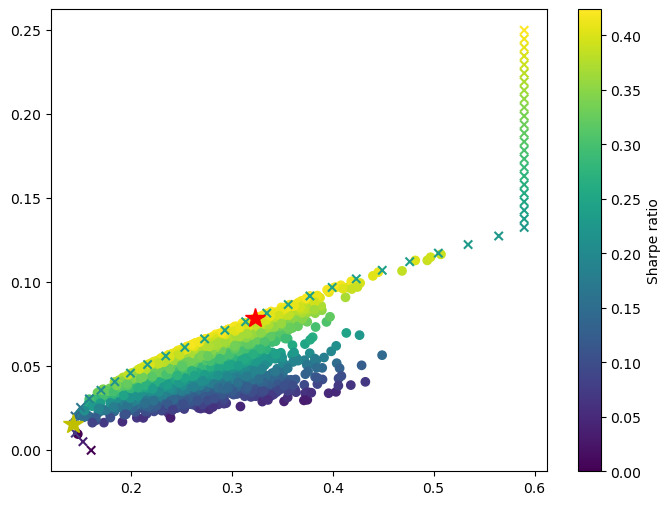

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,
           c=trets/tvols,marker='x')
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*',markersize=15)
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*',markersize=15)
plt.colorbar(label='Sharpe ratio')

有效边界由所有收益率高于绝对最小方差投资组合的最优投资组合组成

# 资本市场线

在理想化世界里，保存在大银行现金账户中的资金可以认为是无风险的，这种无风险投资的缺点就是通常只能得到很少的收益，有时接近于0.

然而考虑这些无风险资产，可以显著加强投资者的有效投资机会。基本思路就是，投资者首先确定高风险资产的一个有效组合，然后在组合中加入无风险资产。通过调整投资于无风险资产中的财富比例，有可能实现风险-收益均衡性，这些配置位于无风险资产和有效投资组合之间的直线上

现在考虑无风险利率$r_{f}$=0.01的情况，我们寻找有效边界上切线穿过风险-收益空间上的点$(\sigma_{f},r_{f})=(0,1)$的投资组合

In [56]:
import scipy.interpolate as sci

ind=np.argmin(tvols)
evols=tvols[ind:]
erets=trets[ind:]

tck=sci.splrep(evols,erets)


In [57]:
def f(x):
    return sci.splev(x,tck,der=0)
def df(x):
    return sci.splev(x,tck,der=1)

In [58]:
def equations(p,rf=0.01):
    eq1=rf-p[0]
    eq2=rf+p[1]*p[2]-f(p[2])
    eq3=p[1]-df(p[2])
    return eq1,eq2,eq3

In [59]:
opt=sco.fsolve(equations,[0.01,0.5,0.15])

D:\Anaconda\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [60]:
opt

array([0.01, 0.5 , 0.15])

# 主成分分析

In [4]:
from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
import akshare as ak
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()


symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE','BAYN.DE', 'BEI.DE','BMW.DE', 'CBK.DE', 'CON.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE','EOAN.DE' ,'FRE.DE', 'HEN3.DE','IFX.DE', 'LHA.DE', 'LIN.DE', 'LXS.DE', 'MRK.DE'
           ,'MUV2.DE', 'RWE.DE','SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE','^GDAXI']

In [5]:
data=pd.DataFrame()
for sym in symbols:
    data[sym]=pdr.get_data_yahoo(sym,start='2010-01-01',end='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
data

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DBK.DE,DPW.DE,...,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE,^GDAXI
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,38.505001,88.540001,44.849998,55.502960,46.445000,32.049999,48.426907,36.867805,39.474529,13.980000,...,27.760000,32.605000,108.300003,68.731125,32.939999,41.740002,63.442383,27.395000,64.114349,6048.299805
2010-01-05,39.720001,88.809998,44.169998,54.489342,46.200001,32.310001,50.069717,39.174160,40.111465,14.000000,...,28.495001,32.365002,108.500000,68.292587,32.645000,44.525002,63.481140,27.764999,62.871826,6031.859863
2010-01-06,39.400002,89.500000,44.450001,54.144909,46.165001,32.810001,51.744587,39.430424,39.692020,14.155000,...,28.350000,32.345001,107.800003,68.163017,33.224998,45.020000,63.713711,27.629999,64.611359,6034.330078
2010-01-07,39.744999,88.470001,44.154999,53.436359,45.700001,33.099998,53.876236,44.483124,39.870674,14.125000,...,28.934999,33.025002,108.050003,67.873978,34.105000,46.200001,64.469551,27.549999,65.356880,6019.359863
2010-01-08,39.599998,87.989998,44.020000,52.963997,44.380001,32.654999,54.573429,45.305096,41.323200,14.460000,...,28.504999,32.689999,107.849998,67.774307,34.345001,46.040001,64.876549,28.070000,66.062630,6037.609863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-19,56.599998,138.449997,69.519997,112.186836,67.989998,89.940002,10.895000,173.600006,22.299295,26.785000,...,38.250000,78.379997,165.100006,26.250000,57.860001,22.950001,92.760002,21.174999,185.250000,9786.959961
2014-12-22,56.889999,139.300003,70.269997,113.564568,67.919998,90.019997,11.010000,174.550003,22.366234,27.260000,...,38.400002,79.639999,167.399994,26.184999,57.849998,23.195000,93.809998,21.180000,185.949997,9865.759766
2014-12-23,56.740002,139.699997,71.010002,113.367752,67.820000,90.830002,11.095000,175.649994,22.625059,27.445000,...,39.029999,78.559998,168.500000,26.375000,58.250000,23.375000,94.589996,21.475000,187.100006,9922.110352


**应用PCA**

In [13]:
scale_function=lambda x:(x-x.mean()/x.std())
pca=KernelPCA().fit(data.apply(scale_function))
cus=np.cumsum(pca.lambdas_)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
#获取每个成分的相关重要性
get_we=lambda x:x/x.sum()
get_we(pca.lambdas_)[:10]

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


array([9.99198042e-01, 4.57911671e-04, 1.52994587e-04, 8.66553930e-05,
       2.87513021e-05, 1.94958959e-05, 1.41067669e-05, 8.58352221e-06,
       6.89706204e-06, 6.03221526e-06])

In [16]:
dax=pd.DataFrame(data.pop('^GDAXI'))

In [17]:
pca=KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['pca_1']=pca.transform(-data)

In [23]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
dax=std.fit_transform(dax)

<AxesSubplot:>

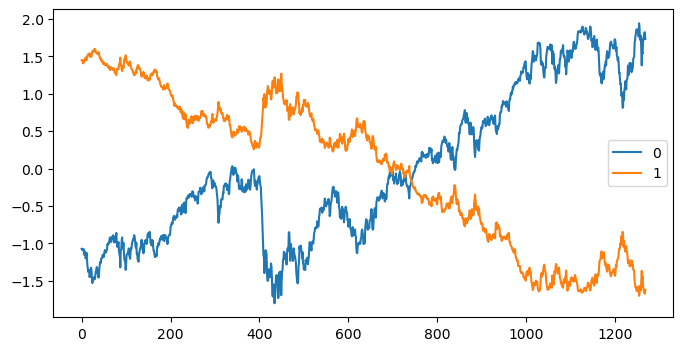

In [25]:
pd.DataFrame(dax).plot(figsize=(8,4))

# 贝叶斯回归
